### Python for Math and Stat: HW #9 by Ethan Schacht

Problem 1.1: This function returns True if num is perfect.

In [3]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def is_perfect(num):
    divisors = []
    for i in range(1, num):
        if num % i == 0:
            divisors.append(i)
    return sum(divisors) == num

is_perfect(28), is_perfect(30)

(True, False)

Problem 1.2: This function returns a list of the perfect numbers among the first maxnum positive integers.

In [3]:
def perfect_nums(maxnum):
    full_lst = [is_perfect(i) for i in range(1, maxnum + 1)]
    perf_list = []
    counter = 0
    for i in full_lst:
        if i == True:
            perf_list.append(counter + 1)
        counter += 1
    return perf_list

perfect_nums(100), perfect_nums(1000)

([6, 28], [6, 28, 496])

Problem 2.1: This function returns True if num is a Mersenne prime.

In [13]:
def is_mersenne(num):
    mersenne = (2 ** num) - 1
    if mersenne == 1:
        return False
    for i in range(2, mersenne):
        if mersenne % i == 0:
            return False
    return True

is_mersenne(11), is_mersenne(13)

(False, True)

Problem 2.2: This function checks the first nprimes prime numbers and returns a list of the primes  𝑝  such that  2𝑝−1  is a Mersenne prime.

In [5]:
def is_prime(num):
    if num == 1:
        return False
    for i in range(2, num):
        if num % i == 0:
            return False
    return True

In [6]:
def mersenne_primes(nprimes):
    prime_list = []
    prime_test = 1
    while len(prime_list) < nprimes: 
        if is_prime(prime_test):
            prime_list.append(prime_test)          
        prime_test += 1
    mers_list = []
    for i in prime_list:
        if is_mersenne(i):
            mers_list.append(i)
    return mers_list
        
mersenne_primes(10)    

[2, 3, 5, 7, 13, 17, 19]

Problem 3.1: This function simulates the Ace and Two Deuces card game. It should randomly choose the position of the ace and randomly choose the initial card to guess. Given the chosen strategy ('stay' or 'switch'), the function should state whether you win or lose.

In [7]:
def guess_ace(strategy):
    cards = ["A", "2", "2"]
    r.shuffle(cards)
    position_choice = r.choice([1,2,3])
    card_choice = cards[position_choice - 1]
    print("Your initial guess: Card", position_choice)
    
    if strategy == "stay":
        print("You decide to stay.") #though a card was removed, we don't change our guess so it doesn't matter
        print("Monty's cards:", cards[0], cards[1], cards[2]) 
    elif strategy == "switch":
        print("You decide to switch.")
        print("Monty's cards:", cards[0], cards[1], cards[2])
        i = 0
        while True:
            if cards[i] == "2":
                cards.remove(cards[i]) #removes a 2 from the choices (doesn't matter which position)
                break
            i += 1
        if card_choice == cards[0]:
            card_choice = cards[1] #switches the choice out of the two remaining cards
        else:
            card_choice = cards[0]
    if card_choice == "A":
        print("Skiing this weekend!")
    else:
        print("No skiing this weekend.")
        
            

guess_ace("switch")

Your initial guess: Card 2
You decide to switch.
Monty's cards: A 2 2
Skiing this weekend!


Problem 3.2: This function simulates the game nsim times for a given strategy.

In [30]:
def guess_ace2(strategy): #modification of guess_ace that has no print statements and returns a bool
    cards = ["A", "2", "2"]
    r.shuffle(cards)
    position_choice = r.choice([1,2,3])
    card_choice = cards[position_choice - 1]
    
    if strategy == "switch":
        i = 0
        while True:
            if cards[i] == "2":
                cards.remove(cards[i]) #removes a 2 from the choices (doesn't matter which position)
                break
            i += 1
        if card_choice == cards[0]:
            card_choice = cards[1] #switches the choice out of the two remaining cards
        else:
            card_choice = cards[0]
    if card_choice == "A":
        return True
    else:
        return False

In [38]:
def guess_ace_prob(strategy, nsim):
    win_loss = []
    for i in range(nsim):
        if strategy == "stay":
            win_loss.append(guess_ace2("stay"))
        elif strategy == "switch":
            win_loss.append(guess_ace2("switch"))
    num_wins = [i for i in win_loss if i == True]
    return len(num_wins) / len(win_loss)

guess_ace_prob("stay", 100000), guess_ace_prob("switch", 100000)

#The best strategy is to switch as this gives the player a 2/3 chance of winning vs 1/3 chance if they stay.  

(0.33207, 0.66596)

Problem 4.1: This function simulates the rolling of ndice dice and returns a list of the probabilities of rolling each sum, from the smallest possible sum to the greatest possible sum.

In [67]:
def dice_sum_sim(ndice, nsim):
    i = 0
    sum_list = []
    while i < nsim:
        sum_die = sum([r.randint(1,6) for i in range(ndice)])
        sum_list.append(sum_die)
        i += 1
       
    sum_counts = []
    for j in range(ndice, (ndice * 6) + 1):
        sum_counter = 0
        for k in sum_list:
            if j == k:
                sum_counter += 1
        sum_counts.append(sum_counter)
    
    prop_list = []
    for j in sum_counts:
        prop_list.append(round(j / sum(sum_counts) * 100,2))
    return list(zip(prop_list, [i for i in range(ndice, ndice * 6 + 1)]))
            
        
dice_sum_sim(2, 100000)

[(2.69, 2),
 (5.37, 3),
 (8.35, 4),
 (11.12, 5),
 (14.09, 6),
 (16.66, 7),
 (13.83, 8),
 (11.08, 9),
 (8.52, 10),
 (5.57, 11),
 (2.73, 12)]

In [69]:
lst1 = [2,3,4]
lst2 = ["Fred", "John"]

list(zip(lst1, lst2))

[(2, 'Fred'), (3, 'John')]

Problem 4.2: Plots dice sum probabilities for n = 3.
    

ValueError: shape mismatch: objects cannot be broadcast to a single shape

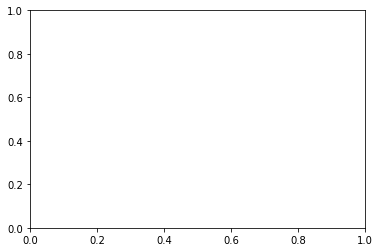

In [70]:
x_vals = list(range(3, 19))
y_vals = dice_sum_sim(3, 10000)

plt.bar(x_vals, y_vals)
plt.title("Dice Sum Probabilities for n = 3")
plt.xlabel("Sums")
plt.ylabel("Probabilities")
plt.show()

For experiment: Make previous function include plot for any ndice value

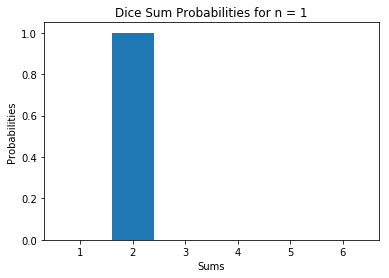

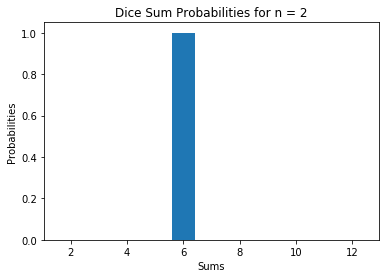

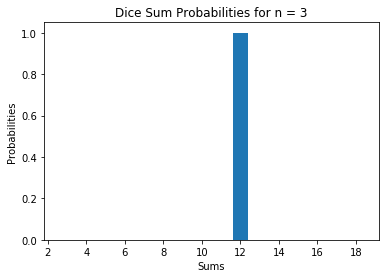

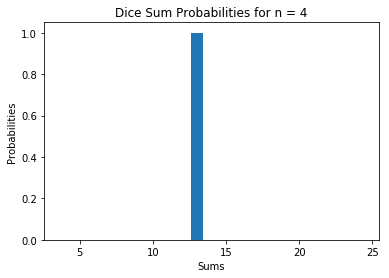

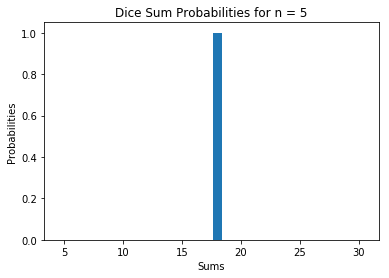

[None, None, None, None, None]

In [87]:
def dice_sum_plot(ndice, nsim):
    i = 0
    sum_list = []
    while i < nsim:
        sum_die = sum([r.randint(1,6) for i in range(ndice)])
        sum_list.append(sum_die)
        i += 1
       
    sum_counts = []
    for j in range(ndice, (ndice * 6) + 1):
        sum_counter = 0
        for k in sum_list:
            if j == k:
                sum_counter += 1
        sum_counts.append(sum_counter)
    
    prop_list = []
    for j in sum_counts:
        prop_list.append(j / sum(sum_counts))

    x_vals = list(range(ndice, (ndice * 6) + 1))
    y_vals = prop_list
    
    plt.bar(x_vals, y_vals)
    plt.title(f"Dice Sum Probabilities for n = {ndice}")
    plt.xlabel("Sums")
    plt.ylabel("Probabilities")
    plt.show()
    
[dice_sum_plot(i, 1) for i in range(1, 6)]